# K Nearest Neighbor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random, generate_random_data, generate_graph
from sklearn.model_selection import train_test_split
from collections import defaultdict
from typing import List

In [2]:
df = generate_random_data.get_knn_kmeans_data(210)
df.head(10)

,Attractiveness Scale,Creativity Scale,Career
0,0.755164,0.177662,OnlyFans
1,0.818664,0.456414,Model
2,0.455999,0.206927,OnlyFans
3,0.285598,0.670394,Artist
4,0.652625,0.574854,Model
5,0.135169,0.672076,Artist
6,0.785396,0.462267,Model
7,0.542956,0.742586,Model
8,0.827460,0.963017,Model
9,0.515658,0.100350,OnlyFans


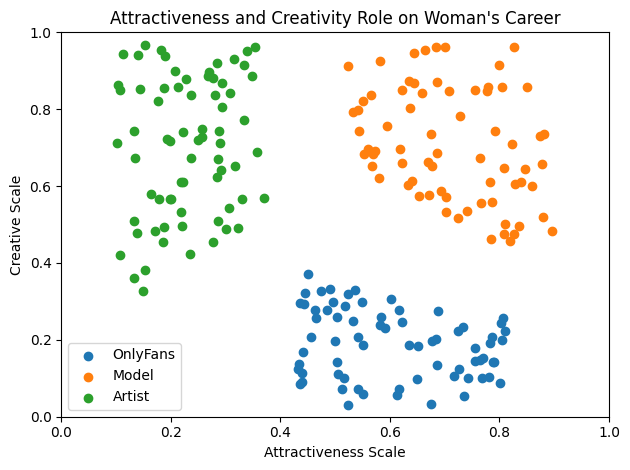

In [3]:
generate_graph.show_knn_kmeans_data(df)

In [ ]:
class WomansCareerKNN:
    def __init__(self, k):
        self._class_count = defaultdict(int)
        self._X_train = None
        self._y_train = None
        self.k = k

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        self._X_train = X
        self._y_train = y

    def predict(self, X: np.ndarray) -> List:
        y_predict = []
        for Xi in X:
            euclidean_distance = np.sqrt(np.sum((self._X_train - Xi) ** 2, axis=1))
            euclidean_distance = pd.Series(euclidean_distance)
            nearest_indexes = euclidean_distance.sort_values()[:self.k].index
            for i in nearest_indexes:
                self._class_count[self._y_train[i]] += 1
            predicted_class = max(self._class_count, key=self._class_count.get)
            y_predict.append(predicted_class)
            self._class_count.clear()
        return y_predict


In [5]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
my_model = WomansCareerKNN(3)
my_model.fit(X_train, y_train)
y_predict = my_model.predict(X_test)
sum(y_predict == y_test) / len(y_test)

np.float64(1.0)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_model = KNeighborsClassifier(3)
sklearn_model.fit(X_train, y_train)
y_predict = sklearn_model.predict(X_test)
sum(y_predict == y_test) / len(y_test)

np.float64(1.0)